In [41]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
pd.options.mode.chained_assignment = None

# Naive-Bayes explaination

If we assume that all features are independant then given a certain point x = (x1, x2, ...), we can calculate the probability that the class of x is y_i using Bayes theorem and the fact that we know the probability of y_i given x. This is true for any probabilty funtion  where we can calulate the probability of x given y. In the first example we have two features using the Bernoulli distribution.

### Create the dataset

In [95]:
X, y = make_blobs(n_samples=100, random_state=42, n_features=2, cluster_std=3, centers=3)

<AxesSubplot:xlabel='x1', ylabel='x2'>

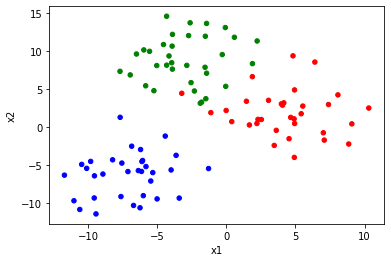

In [96]:
df = pd.DataFrame(X, columns=['x1', 'x2'])

#kbins = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
#df = kbins.fit_transform(df)

df['y'] = y

col = df['y'].map({1:'r', 2:'b', 0:'g'})

df[['x1', 'x2']].plot(kind='scatter', x='x1', y='x2', color=col)

In [97]:
# convert each feature to boolean

def greater_than(threshold, entry):
    if entry > threshold:
        return 1
    return 0

df.loc[:, 'x1'] = df['x1'].apply(lambda x: greater_than(0, x)).astype(int)
df.loc[:, 'x2'] = df['x2'].apply(lambda x: greater_than(0, -x)).astype(int)

X = df[['x1', 'x2']]
y = df['y']

df.head()

,x1,x2,y
0,0,1,2
1,1,1,1
2,0,0,0
3,1,1,1
4,0,1,2


### Define the class

In [98]:
class NB():
    def __init__(self):
        self.p = {}
        self.classes = []
        
    def fit(self, X, y):
        y = pd.Series(y)
        X = pd.DataFrame(X)
        
        self.classes = pd.Series(y).unique()
        for y_i in self.classes:
            self.p[y_i] = y[y==y_i].shape[0]/y.shape[0]
            for x in range(len(X.columns)):
                for x_i in X.iloc[:, x].unique():
                    # the probability of x_i in feature x given y_i
                    self.p[(x_i, x, y_i)] = (X[(y == y_i) & (X.iloc[:, x] == x_i)].shape[0] / X[(y == y_i)].shape[0])
        
    def predict(self, array):
        result_list = []
        for x in array:
            y_list = []
            for y_i in self.classes:
                prob = self.p[y_i]
                for i, x_i in enumerate(x):
                    prob *= self.p[(x_i, i, y_i)]
                y_list.append((y_i, prob))
            result_list.append(max(y_list, key=lambda x: x[1])[0])
        return result_list

In [99]:
model =  NB()

model.fit(X, y)

model.p
model.predict([[0, 0], [1, 0], [0, 1], [1, 1]])

[0, 1, 2, 1]